## PREPROCESSING DATA

In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('/content/grand-total-aluminium-day.csv')

In [ ]:
df.head()

,day,grand total
0,1/12/2023,1591
1,1/12/2023,3185
2,1/12/2023,14333
3,1/12/2023,1594
4,1/12/2023,12735


In [ ]:
df.shape

(1590, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1590 entries, 0 to 1589
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          1590 non-null   object
 1   grand total  1590 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.0+ KB


In [ ]:
# Mengubah tipe data kolom 'Tanggal' menjadi datetime
df['day'] = pd.to_datetime(df['day'])

# Mengelompokkan data berdasarkan tanggal dan menjumlahkan total pembelian
df = df.groupby('day')['grand total'].sum().reset_index()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          155 non-null    datetime64[ns]
 1   grand total  155 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.5 KB


In [ ]:
# mengambil kolom yang digunakan
df.columns=["day","grand total"]
df.head()

,day,grand total
0,2023-01-12,309811
1,2023-01-16,125000
2,2023-01-17,25475
3,2023-01-23,25490
4,2023-01-25,54742


In [ ]:
df.set_index('day',inplace=True)

In [ ]:
# info statistik
df.describe()

,grand total
count,155.000000
mean,79961.225806
std,53441.933136
min,1594.000000
25%,48665.500000
50%,58962.000000
75%,102395.000000
max,309811.000000


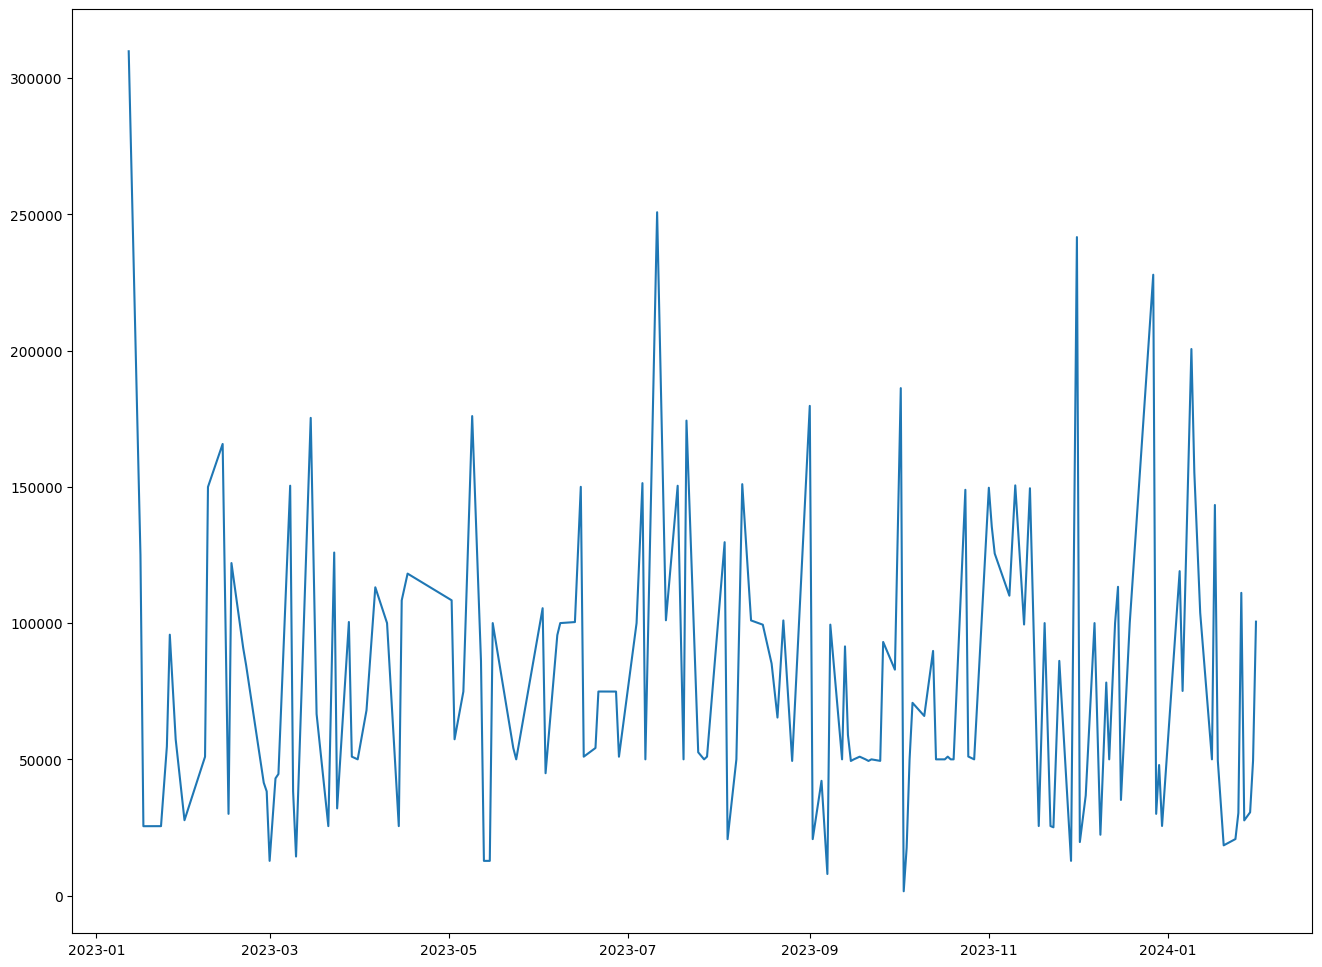

In [ ]:
# plot data original
plt.figure(1, figsize=(16,12))
_= plt.plot(df['grand total'])

## MODEL ARIMA

In [ ]:
# untuk menghitung parameter arima
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['grand total'].dropna())
print("ADF Statistic: %s " % result[0])
print("p-value: %s " % result[1])

ADF Statistic: -13.44496816049422 
p-value: 3.7806647104404174e-25 


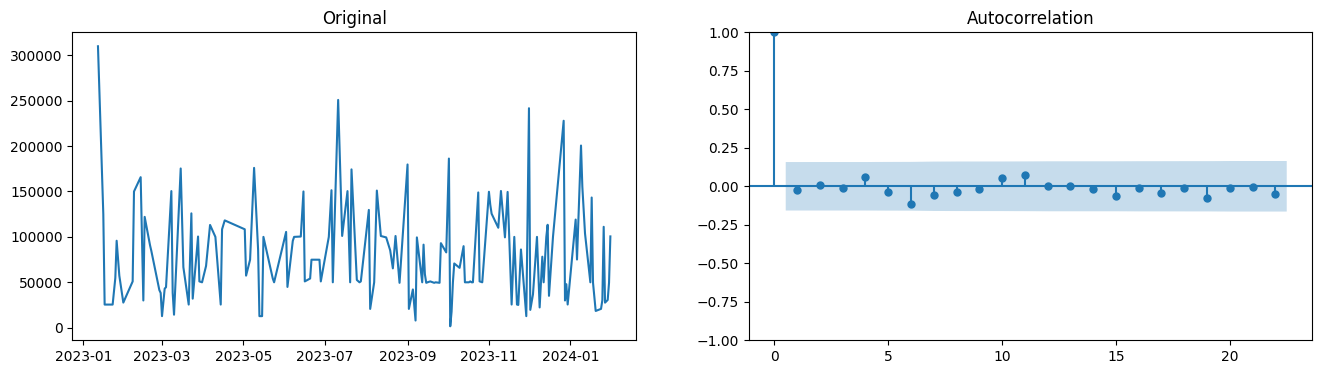

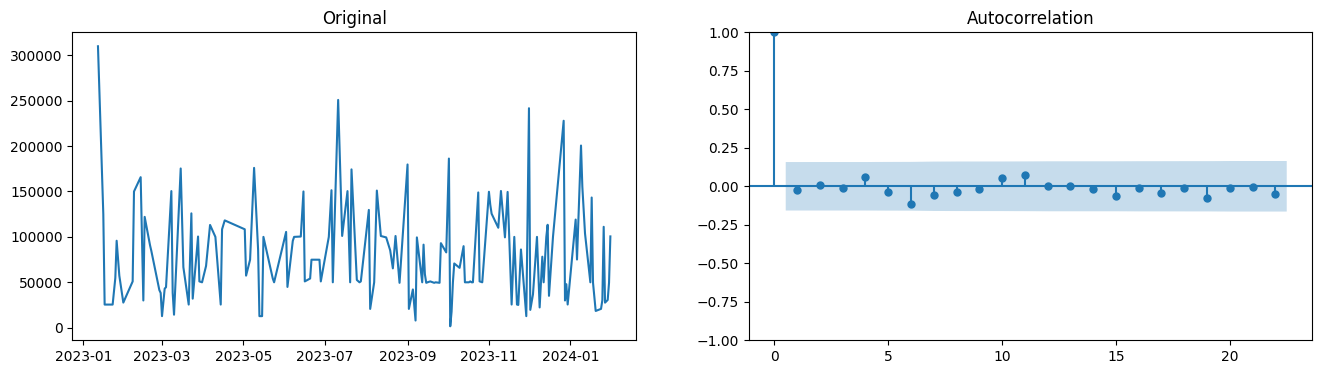

In [ ]:
#
from statsmodels.graphics.tsaplots import plot_acf

fig, (ax1, ax2) = plt.subplots(1 , 2, figsize=(16,4))

ax1.plot(df['grand total'])
ax1.set_title('Original')
plot_acf(df['grand total'], ax=ax2)

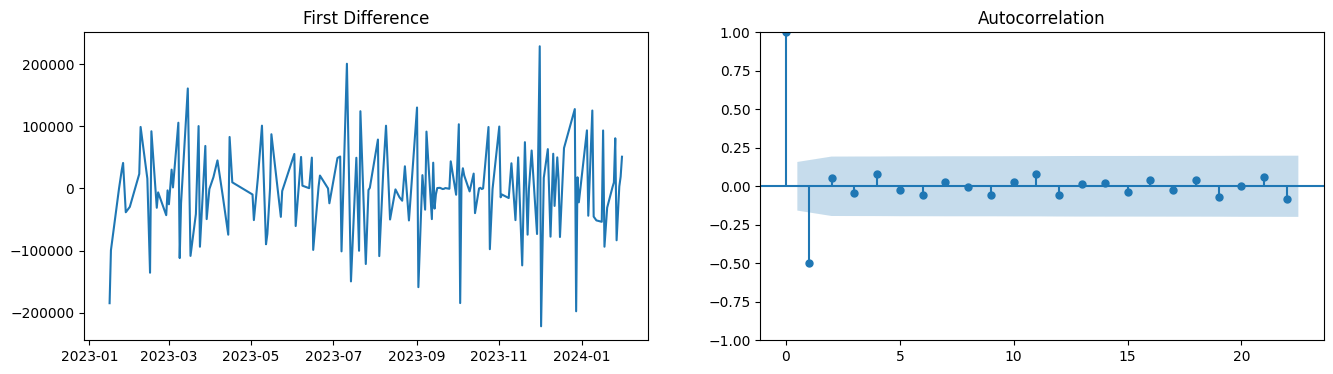

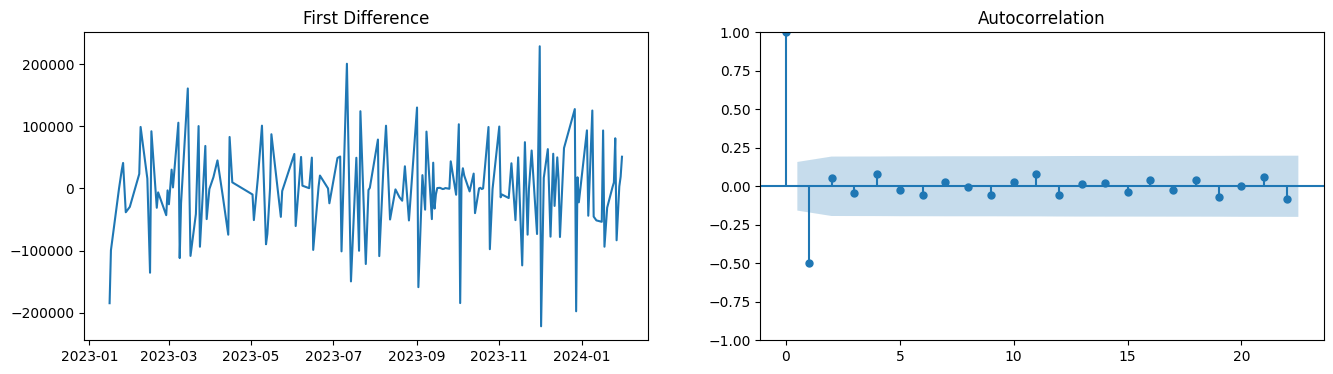

In [ ]:
diff = df['grand total'].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1 , 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title('First Difference')
plot_acf(diff, ax=ax2)

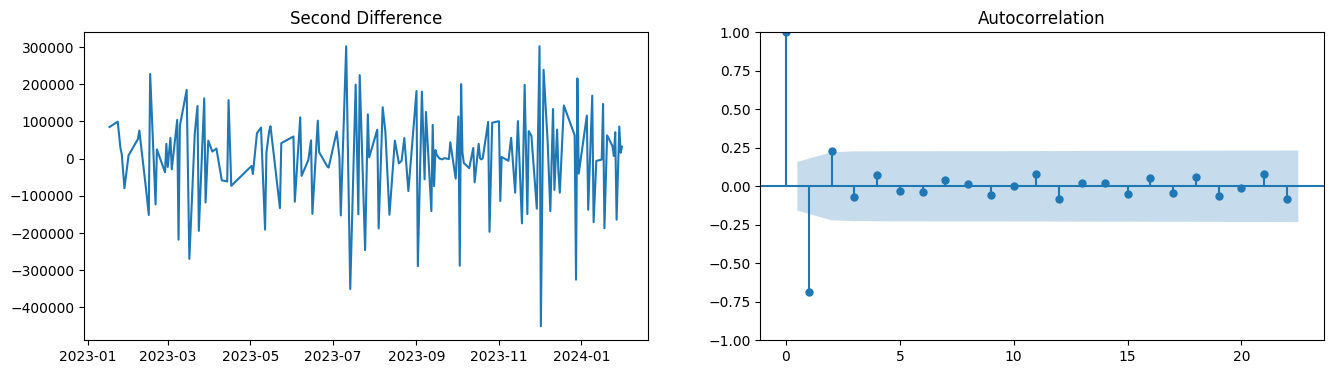

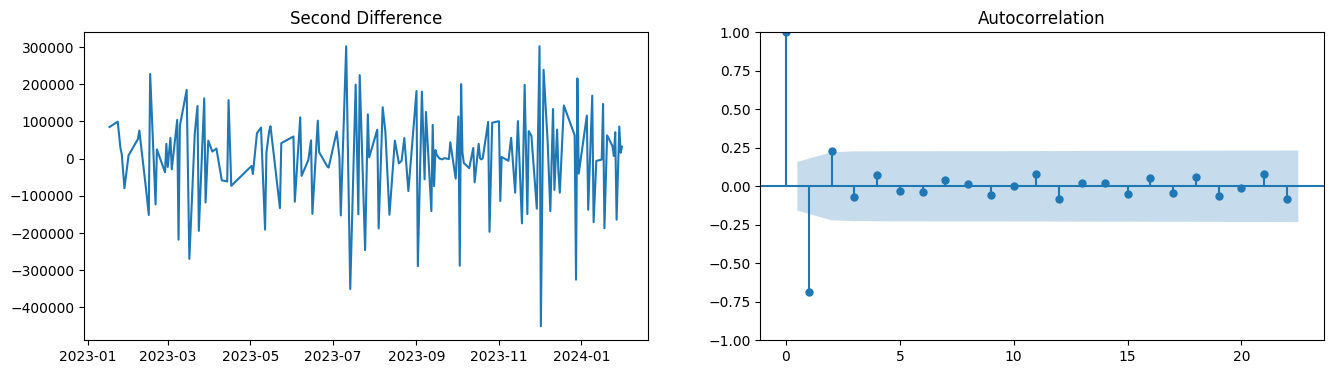

In [ ]:
diff = df['grand total'].diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1 , 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Second Difference')
plot_acf(diff, ax=ax2)

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.7 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima.utils import ndiffs

ndiffs(df['grand total'], test='adf')

0

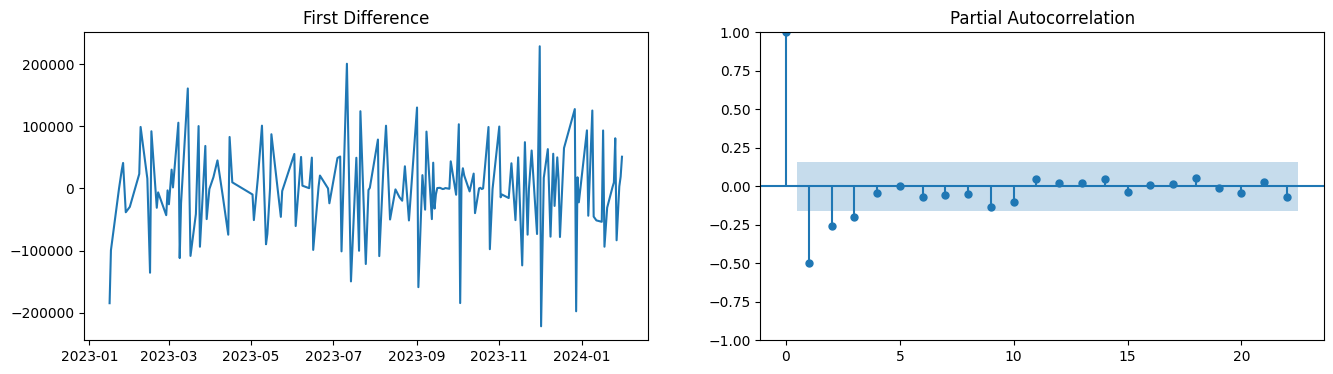

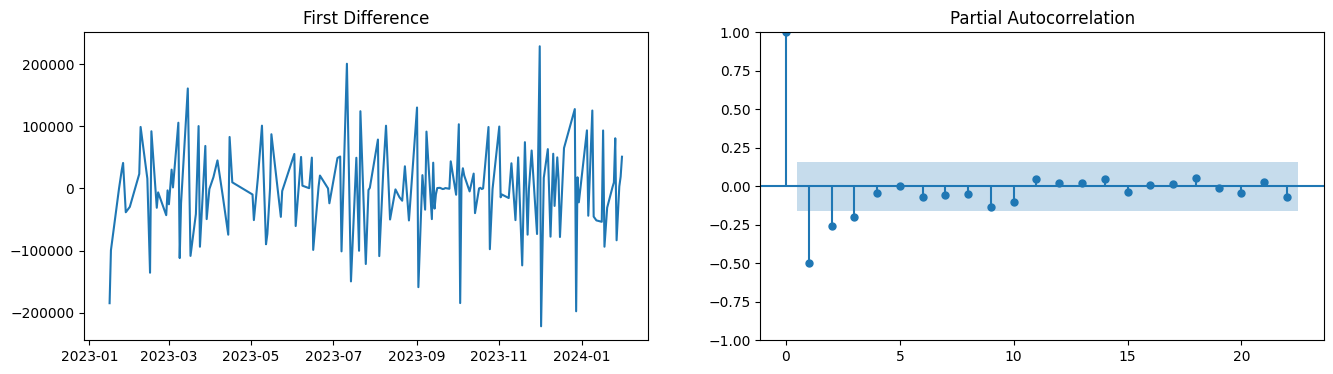

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

diff = df['grand total'].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1 , 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title('First Difference')
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['grand total'], order=(30,1,30))
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:            grand total   No. Observations:                  155
Model:               ARIMA(30, 1, 30)   Log Likelihood               -1934.439
Date:                Tue, 09 Apr 2024   AIC                           3990.879
Time:                        12:38:50   BIC                           4176.133
Sample:                             0   HQIC                          4066.128
                                - 155                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6730      1.881     -0.358      0.720      -4.359       3.013
ar.L2         -0.5833      1.538     -0.379      0.705      -3.598       2.432
ar.L3         -0.8265      0.782     -1.057      0.2

(array([3.02145191e-06, 7.47411788e-06, 7.79216545e-06, 4.29364219e-06,
        1.59023785e-06, 1.59023785e-07, 1.59023785e-07, 0.00000000e+00,
        0.00000000e+00, 1.59023785e-07]),
 array([-95890.12928503, -55320.01635653, -14749.90342803,  25820.20950048,
         66390.32242898, 106960.43535748, 147530.54828599, 188100.66121449,
        228670.77414299, 269240.8870715 , 309811.        ]),
 <BarContainer object of 10 artists>)

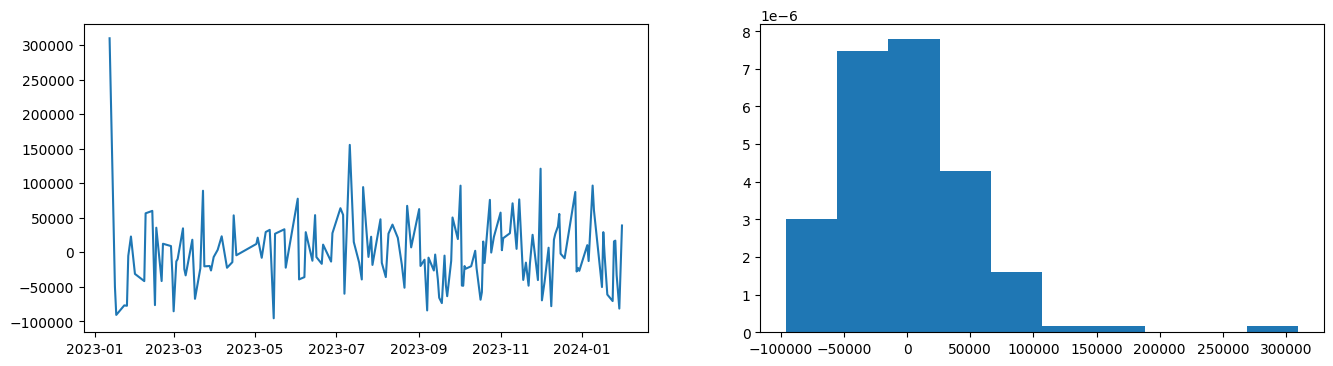

In [ ]:
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1 , 2, figsize=(16,4))

ax1.plot(residuals)
ax2.hist(residuals, density=True)

In [ ]:
len(df)

155

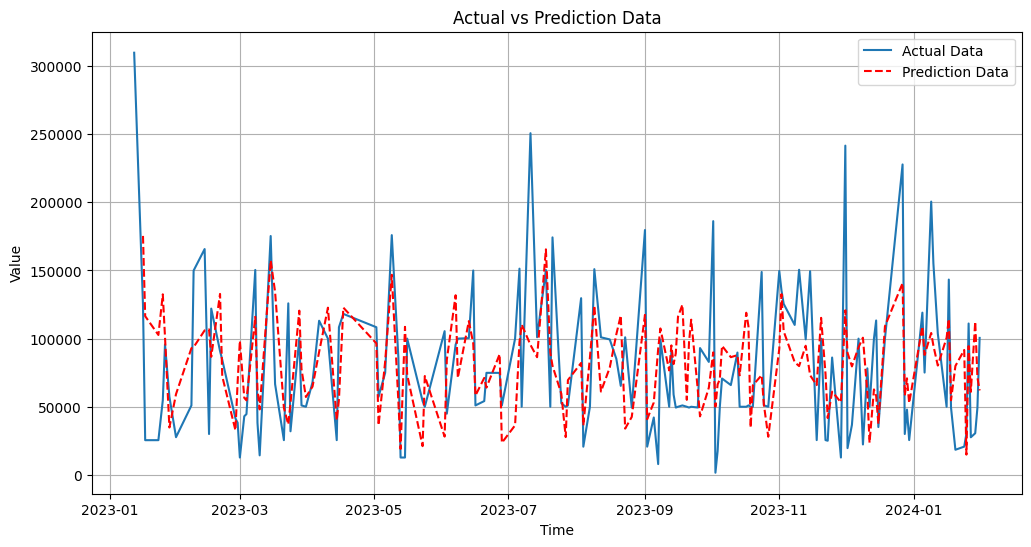

In [ ]:
##30130
prediction = result.predict(start=1, end=154)

# Plot actual data and prediction data
plt.figure(figsize=(12, 6))
plt.plot(df['grand total'], label='Actual Data')
plt.plot(prediction, label='Prediction Data', linestyle='--', color='red')
plt.title('Actual vs Prediction Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate RMSE
actual_values = df['grand total']
rmse = np.sqrt(((prediction - actual_values) ** 2).mean())

print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual_values - prediction) / actual_values)) * 100

print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Root Mean Squared Error (RMSE): 46066.72389098674
Mean Absolute Percentage Error (MAPE): 100.04818521528303%


## FORECAST 1 YEAR

In [ ]:
start_forecast = len(df)
end_forecast = start_forecast+364
forecast = result.predict(start=start_forecast, end=end_forecast)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
print(forecast)

155    123320.650501
156     44031.465973
157     59597.778392
158     91967.114373
159     94081.313656
           ...      
515    103112.563915
516     94978.785214
517     81597.383854
518     81197.926541
519     85895.143268
Name: predicted_mean, Length: 365, dtype: float64


In [ ]:
df['grand total']

day
2023-01-12    309811
2023-01-16    125000
2023-01-17     25475
2023-01-23     25490
2023-01-25     54742
               ...  
2024-01-26    111094
2024-01-27     27602
2024-01-29     30573
2024-01-30     49481
2024-01-31    100523
Name: grand total, Length: 155, dtype: int64

In [ ]:
# dataframe berisi data tanggal untuk 1 tahun kedepan
date_forecast = pd.date_range(start=df.index[-1], periods=365, freq='D') + pd.DateOffset(days=1)
df_forecast = pd.DataFrame({'day': date_forecast, 'nilai_forecast': forecast})
df_forecast = df_forecast.set_index('day')

In [ ]:
df_forecast

,nilai_forecast
day,
2024-02-01,123320.650501
2024-02-02,44031.465973
2024-02-03,59597.778392
2024-02-04,91967.114373
2024-02-05,94081.313656
...,...
2025-01-26,103112.563915
2025-01-27,94978.785214
2025-01-28,81597.383854


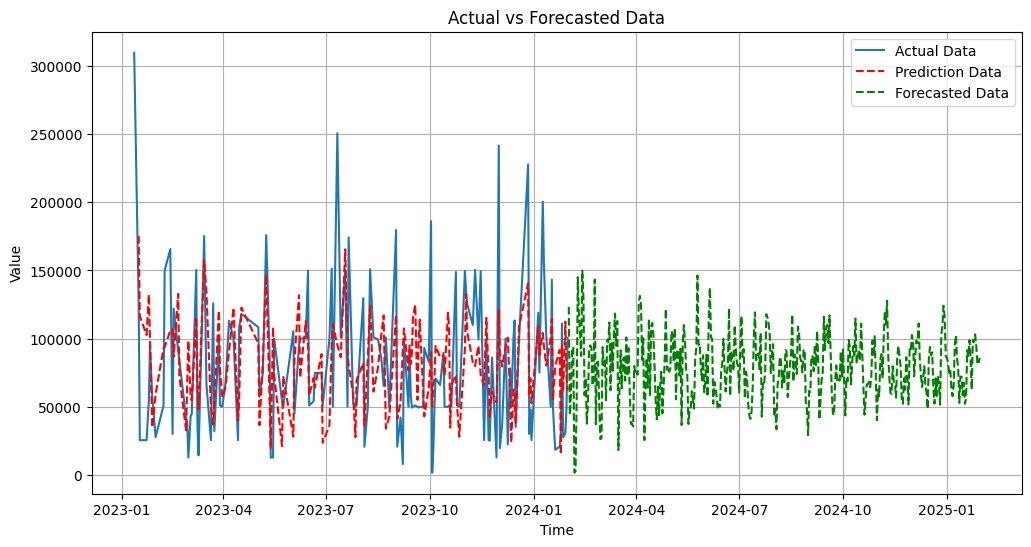

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['grand total'], label='Actual Data')
plt.plot(prediction, label='Prediction Data', linestyle='--', color='red')
plt.plot(df_forecast['nilai_forecast'], label='Forecasted Data', linestyle='--', color='green')
plt.title('Actual vs Forecasted Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()